In [152]:
import numpy as np 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Mean poverty rate of each state
1. Most common 15 Name or Surname of killed people
1. Killed People According to Races
1. Box and Swarm Plots in kill data
1. Kill properties (Count Plot)
    * Number of people by gender
    * Kill weapon
    * Age of killed people
    * Race of killed people
    * Most dangerous cities
    * Most dangerous states
    * Having mental ilness or not for killed people
    * Threat types
    * Flee types
<br>

In [153]:
pr = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
sr = pd.read_csv('ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1. Mean poverty rate of each state

In [154]:
pr.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [155]:
#pr.rename(columns={'Geographic Area':'States'},inplace=True)


In [156]:
pr['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [157]:
pr["Geographic Area"].nunique()


51

In [158]:
pr["City"].nunique()

24255

In [159]:
pr.groupby("Geographic Area").poverty_rate.value_counts()

Geographic Area  poverty_rate
AK               0               39
                 -               21
                 8.2              5
                 14.9             4
                 11.7             3
                                 ..
WY               8.2              1
                 8.4              1
                 9.2              1
                 9.3              1
                 9.4              1
Name: poverty_rate, Length: 12425, dtype: int64

In [160]:
pr.poverty_rate.value_counts().mean()

38.0402075226978

**INSTRUCTION-1: replace the "-" with zero.**

In [161]:
pr.poverty_rate.replace(['-'],0.0,inplace = True)


In [162]:
pr.poverty_rate.value_counts()

0       1464
0.0      201
7.4      129
6.7      129
10       128
        ... 
89.6       1
83.7       1
71.1       1
50.7       1
50.6       1
Name: poverty_rate, Length: 771, dtype: int64

In [163]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [164]:
print(pr.poverty_rate.dtype)

object


**INSTRUCTION-2 : Convert type of poverty_rate colum to a numeric type (float).**

In [165]:
pr.poverty_rate = pr.poverty_rate.astype(float)

In [166]:
pr['poverty_rate'] = pd.to_numeric(pr['poverty_rate'], errors= "coerce")
pr['poverty_rate']

0        78.8
1        29.1
2        25.5
3        30.7
4        42.0
         ... 
29324    18.6
29325    15.3
29326     5.9
29327     5.4
29328     0.0
Name: poverty_rate, Length: 29329, dtype: float64

In [167]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


**INSTRUCTION-3 : Plot the Poverty rate of each state. (Demonstrate mean value of each Geogrophic Area (AL, AK, AR).)**

In [168]:
pr.groupby('Geographic Area').poverty_rate.mean().head()


Geographic Area
AK    18.678592
AL    20.611795
AR    22.963216
AZ    25.268071
CA    16.888371
Name: poverty_rate, dtype: float64

In [169]:
type(pr)

pandas.core.frame.DataFrame

**INSTRUCTION-3.a.1 : Plot With Pandas Built in method:**

In [170]:
#pr.groupby('Geographic Area').poverty_rate.mean().plot.bar(figsize = (15, 10))


In [171]:
pr1 = pr.groupby("Geographic Area").poverty_rate.mean()

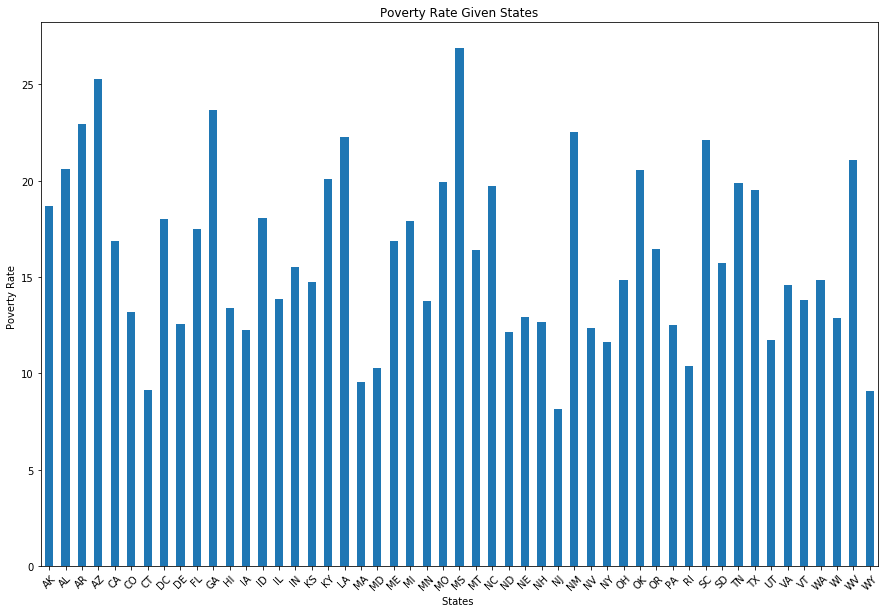

In [172]:
pr1.plot.bar(rot= 45,figsize = (15, 10))

plt.xlabel("States ")
plt.ylabel("Poverty Rate ")
plt.title('Poverty Rate Given States');


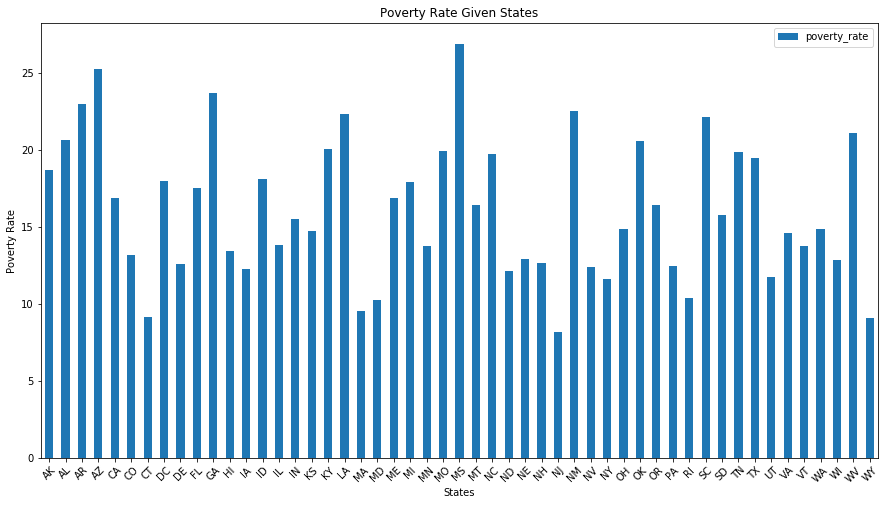

In [173]:
pr.groupby("Geographic Area").poverty_rate.mean().plot.bar(figsize=(15,8))
plt.xticks(rotation=45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')
plt.legend();

**INSTRUCTION-3.a.2 : Plot Sorted Values With Pandas Built in method:**

In [174]:
pr1.sort_values(ascending=False).head()

Geographic Area
MS    26.884254
AZ    25.268071
GA    23.663636
AR    22.963216
NM    22.507675
Name: poverty_rate, dtype: float64

In [175]:
pr2 = pr1.sort_values(ascending=False)

In [176]:
pr2.shape

(51,)

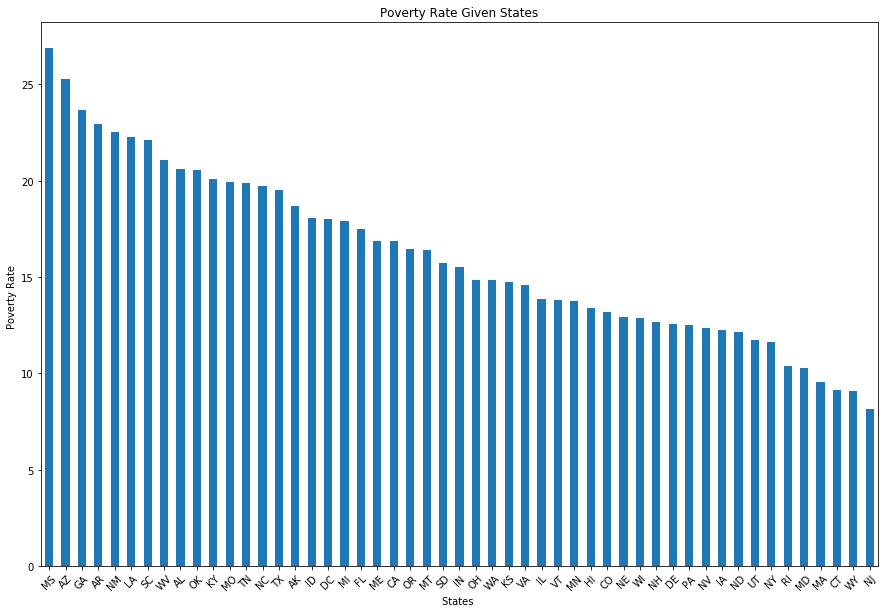

In [177]:
pr2.plot.bar(rot= 45,figsize = (15, 10))

plt.xlabel("States ")
plt.ylabel("Poverty Rate ")
plt.title('Poverty Rate Given States')

plt.show()

**INSTRUCTION-3.b : Plot Sorted Values With Matplotlib:** 

In [178]:
#print(pr2.columns.tolist()) 

In [179]:
pr2.reset_index(level=0, inplace=True) # to draw bar with mathplotlib, we have to use lists which are seperated x and y values.
pr2.head()

TypeError: Cannot reset_index inplace on a Series to create a DataFrame

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
fig, ax = plt.subplots(figsize=(15, 10))
plt.bar(x='Geographic Area',y='poverty_rate', data=pr2)
plt.xlabel("Geographic Area")
plt.ylabel("Poverty Rate ")
plt.title('Poverty Rate Given States')
ax.set_xticklabels(pr2.States, rotation=45); 
plt.tight_layout()
plt.show()

In [180]:
aa=pr.groupby('Geographic Area').poverty_rate.mean().sort_values(ascending=False).index


In [181]:
bb=pr.groupby('Geographic Area').poverty_rate.mean().sort_values(ascending=False).values


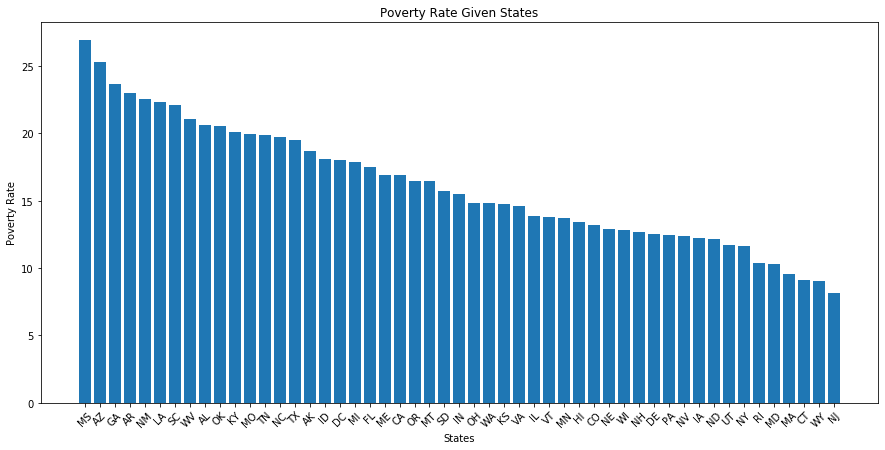

In [182]:
plt.figure(figsize=(15,7))
plt.bar(aa, bb)
plt.xticks(rotation=45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States');

**INSTRUCTION-3.c : Plot Sorted Values With Seaborn** 

ValueError: Could not interpret input 'Geographic Area'

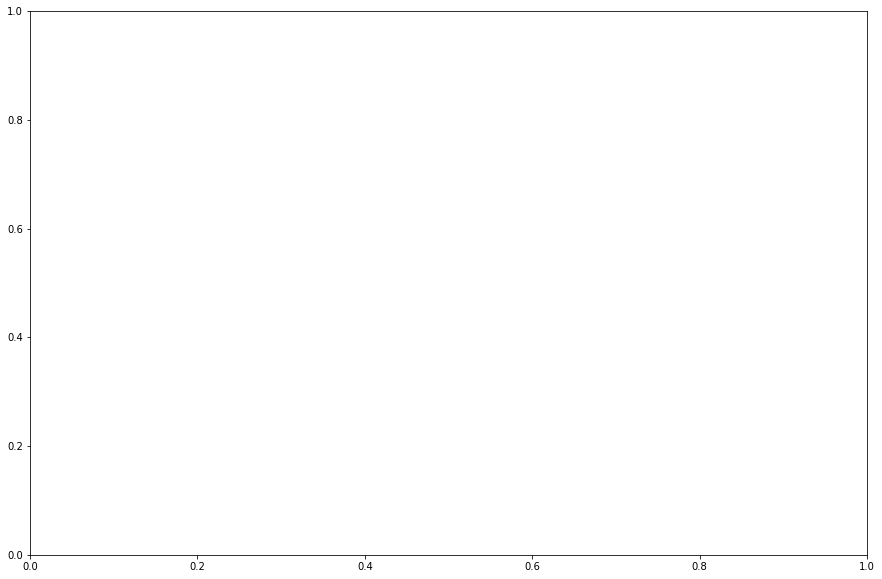

In [183]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='Geographic Area',y='poverty_rate', data=pr2)
#plt.bar (pr3.States,pr3.poverty_rate) for mathplotlib.
plt.xlabel("States")
plt.ylabel("Poverty Rate ")
plt.title('Poverty Rate Given States')
ax.set_xticklabels(pr2.States, rotation=45); 
plt.tight_layout()
plt.show()



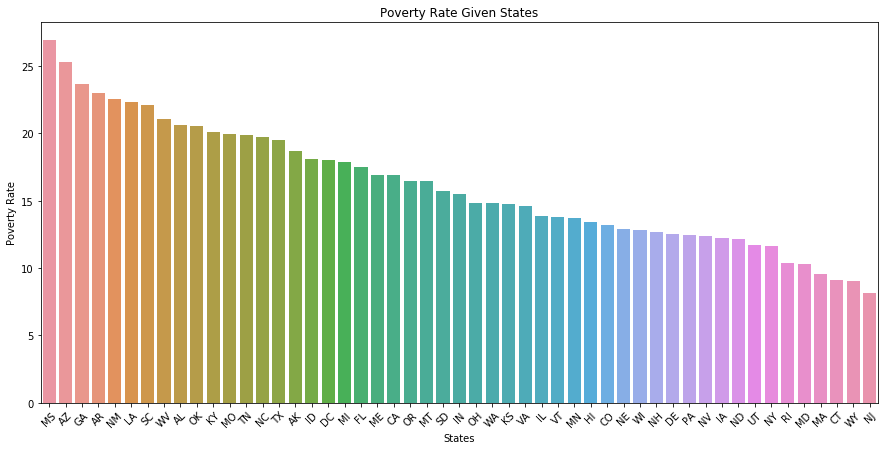

In [184]:
plt.figure(figsize=(15,7))          # alternative method like matplotlib
sns.barplot(aa, bb)
plt.xticks(rotation=45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States');

## 2. Most common 15 Name or Surname of killed people 

In [185]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [186]:
kill.shape

(2535, 14)

In [187]:
kill.name.value_counts()

TK TK                  49
Brandon Jones           2
TK Tk                   2
Michael Johnson         2
Eric Harris             2
                       ..
William Lee Snider      1
Jason Smith             1
Daniel Kevin Harris     1
Wade Allen Baker        1
Dylan Papa              1
Name: name, Length: 2481, dtype: int64

In [188]:
# Problem: TK TK is most probably not a name or surname. We will clean them.
pairs = kill.name[kill.name != 'TK TK'].str.split()
pairs.head()

0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

In [189]:
type(pairs)

pandas.core.series.Series

**INSTRUCTION : Plot Most common 15 Name or Surname of killed people** 

In [190]:
df = pd.DataFrame(pairs)
df.head()

,name
0,"[Tim, Elliot]"
1,"[Lewis, Lee, Lembke]"
2,"[John, Paul, Quintero]"
3,"[Matthew, Hoffman]"
4,"[Michael, Rodriguez]"


In [191]:
len(df.name)

2486

In [192]:
df["len"] = df.name.apply(lambda x : len(x))

In [193]:
df.head()

,name,len
0,"[Tim, Elliot]",2
1,"[Lewis, Lee, Lembke]",3
2,"[John, Paul, Quintero]",3
3,"[Matthew, Hoffman]",2
4,"[Michael, Rodriguez]",2


In [194]:
df["len_new"] = df.name.apply(len)

In [195]:
df.head()

,name,len,len_new
0,"[Tim, Elliot]",2,2
1,"[Lewis, Lee, Lembke]",3,3
2,"[John, Paul, Quintero]",3,3
3,"[Matthew, Hoffman]",2,2
4,"[Michael, Rodriguez]",2,2


In [196]:
df.len.value_counts()

2    1602
3     836
4      48
Name: len, dtype: int64

In [197]:
df.name.loc[1]

['Lewis', 'Lee', 'Lembke']

In [198]:
two_names = df.name[df.len == 2]

In [199]:
two_names.head()

0           [Tim, Elliot]
3      [Matthew, Hoffman]
4    [Michael, Rodriguez]
7        [Brock, Nichols]
8        [Autumn, Steele]
Name: name, dtype: object

In [200]:
three_names = df.name[df.len == 3]

In [201]:
 four_names = df.name[df.len == 4]

In [202]:
a,b = zip(*two_names)

In [203]:
a[:5]

('Tim', 'Matthew', 'Michael', 'Brock', 'Autumn')

In [204]:
b[:5]

('Elliot', 'Hoffman', 'Rodriguez', 'Nichols', 'Steele')

In [205]:
c,d,e = zip(*three_names)

In [206]:
three_names.head()

1       [Lewis, Lee, Lembke]
2     [John, Paul, Quintero]
5      [Kenneth, Joe, Brown]
6    [Kenneth, Arnold, Buck]
9        [Leslie, Sapp, III]
Name: name, dtype: object

In [207]:
c[:5]

('Lewis', 'John', 'Kenneth', 'Kenneth', 'Leslie')

In [208]:
d[:5]

('Lee', 'Paul', 'Joe', 'Arnold', 'Sapp')

In [209]:
e[:5]

('Lembke', 'Quintero', 'Brown', 'Buck', 'III')

In [210]:
f,g,h,i = zip(*four_names)

In [211]:
four_names.head()

12      [Hashim, Hanif, Ibn, Abdul-Rasheed]
14    [Omarr, Julian, Maximillian, Jackson]
47    [Miguel, Angel, de, Santos-Rodriguez]
54          [Jose, Antonio, Espinoza, Ruiz]
78             [Francis, Murphy, Rose, III]
Name: name, dtype: object

In [212]:
f[:5]

('Hashim', 'Omarr', 'Miguel', 'Jose', 'Francis')

In [213]:
len(a)

1602

In [214]:
total_list = a+b+c+d+e+f+g+h+i

In [215]:
total_list

('Tim',
 'Matthew',
 'Michael',
 'Brock',
 'Autumn',
 'Patrick',
 'Ron',
 'Loren',
 'Thomas',
 'Jimmy',
 'Andy',
 'Tommy',
 'Brian',
 'Salvador',
 'Richard',
 'Marcus',
 'Michael',
 'Mario',
 'Talbot',
 'Robert',
 'Donte',
 'Jose',
 'Nathan',
 'Scott',
 'Zaki',
 'Terence',
 'Pablo',
 'Daniel',
 'Jonathan',
 'Carter',
 'Paul',
 'Dewayne',
 'Isaac',
 'Andrew',
 'Tiano',
 'Kristiana',
 'Demaris',
 'Wendell',
 'Daryl',
 'Darin',
 'William',
 'Jessie',
 'Raymond',
 'David',
 'Chris',
 'Jermonte',
 'Tiffany',
 'Matautu',
 'Cody',
 'Ralph',
 'Alan',
 'Jacob',
 'David',
 'Yuvette',
 'Anthony',
 'Jeremy',
 'Izzy',
 'Salvador',
 'Joaquin',
 'Markell',
 'Herbert',
 'John',
 'James',
 'Sawyer',
 'Vincent',
 'Joseph',
 'Larry',
 'Kenneth',
 'Desmond',
 'Antonio',
 'Anthony',
 'Brian',
 'Phillip',
 'Andres',
 'Richard',
 'Daniel',
 'Lavall',
 'Bruce',
 'Lawrence',
 'Cody',
 'Betty',
 'Michael',
 'Matthew',
 'Douglas',
 'Janisha',
 'Alejandro',
 'Ruben',
 'Douglas',
 'Kent',
 'Bradford',
 'Jerome',
 

In [216]:
len(total_list)

5904

In [217]:
name_count=Counter(total_list)

In [218]:
name_count

Counter({'Tim': 3,
         'Matthew': 24,
         'Michael': 91,
         'Brock': 2,
         'Autumn': 1,
         'Patrick': 15,
         'Ron': 2,
         'Loren': 3,
         'Thomas': 27,
         'Jimmy': 5,
         'Andy': 1,
         'Tommy': 3,
         'Brian': 12,
         'Salvador': 4,
         'Richard': 36,
         'Marcus': 5,
         'Mario': 8,
         'Talbot': 1,
         'Robert': 48,
         'Donte': 3,
         'Jose': 28,
         'Nathan': 6,
         'Scott': 27,
         'Zaki': 1,
         'Terence': 3,
         'Pablo': 4,
         'Daniel': 46,
         'Jonathan': 13,
         'Carter': 5,
         'Paul': 19,
         'Dewayne': 3,
         'Isaac': 2,
         'Andrew': 20,
         'Tiano': 1,
         'Kristiana': 1,
         'Demaris': 1,
         'Wendell': 1,
         'Daryl': 1,
         'Darin': 1,
         'William': 47,
         'Jessie': 3,
         'Raymond': 11,
         'David': 57,
         'Chris': 3,
         'Jermonte': 1,
    

In [219]:
most_common_names = name_count.most_common(15)

In [220]:
most_common_names

[('Michael', 91),
 ('David', 57),
 ('James', 57),
 ('Robert', 48),
 ('Joseph', 48),
 ('William', 47),
 ('Daniel', 46),
 ('John', 42),
 ('Christopher', 40),
 ('Lee', 38),
 ('Richard', 36),
 ('Smith', 36),
 ('Anthony', 32),
 ('Johnson', 32),
 ('J.', 32)]

In [221]:
x,y = zip(*most_common_names)### tuple i list yaptik daha kullanisli

In [222]:
x,y =list(x), list(y)

In [223]:
type(x)

list

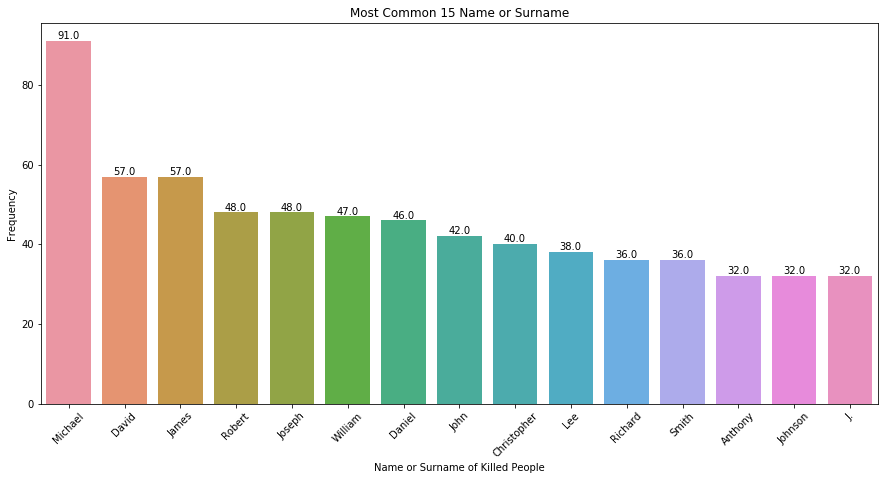

In [224]:
plt.figure(figsize=(15,7))          # alternative method like matplotlib
g=sns.barplot(x, y)
plt.xticks(rotation=45)
plt.xlabel('Name or Surname of Killed People')
plt.ylabel('Frequency')
plt.title('Most Common 15 Name or Surname')

for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+0.5));

### 2.Method

In [225]:
a[1]

'Matthew'

In [226]:
k = [" ".join(item).strip() if type(item) == list else item for item in a]
z = str(k).split()
z

["['Tim',",
 "'Matthew',",
 "'Michael',",
 "'Brock',",
 "'Autumn',",
 "'Patrick',",
 "'Ron',",
 "'Loren',",
 "'Thomas',",
 "'Jimmy',",
 "'Andy',",
 "'Tommy',",
 "'Brian',",
 "'Salvador',",
 "'Richard',",
 "'Marcus',",
 "'Michael',",
 "'Mario',",
 "'Talbot',",
 "'Robert',",
 "'Donte',",
 "'Jose',",
 "'Nathan',",
 "'Scott',",
 "'Zaki',",
 "'Terence',",
 "'Pablo',",
 "'Daniel',",
 "'Jonathan',",
 "'Carter',",
 "'Paul',",
 "'Dewayne',",
 "'Isaac',",
 "'Andrew',",
 "'Tiano',",
 "'Kristiana',",
 "'Demaris',",
 "'Wendell',",
 "'Daryl',",
 "'Darin',",
 "'William',",
 "'Jessie',",
 "'Raymond',",
 "'David',",
 "'Chris',",
 "'Jermonte',",
 "'Tiffany',",
 "'Matautu',",
 "'Cody',",
 "'Ralph',",
 "'Alan',",
 "'Jacob',",
 "'David',",
 "'Yuvette',",
 "'Anthony',",
 "'Jeremy',",
 "'Izzy',",
 "'Salvador',",
 "'Joaquin',",
 "'Markell',",
 "'Herbert',",
 "'John',",
 "'James',",
 "'Sawyer',",
 "'Vincent',",
 "'Joseph',",
 "'Larry',",
 "'Kenneth',",
 "'Desmond',",
 "'Antonio',",
 "'Anthony',",
 "'Brian',",


In [227]:
len(z)

1602

In [228]:
name_lst = Counter(z)
name_lst

Counter({"['Tim',": 1,
         "'Matthew',": 15,
         "'Michael',": 47,
         "'Brock',": 1,
         "'Autumn',": 1,
         "'Patrick',": 5,
         "'Ron',": 1,
         "'Loren',": 1,
         "'Thomas',": 7,
         "'Jimmy',": 2,
         "'Andy',": 1,
         "'Tommy',": 3,
         "'Brian',": 8,
         "'Salvador',": 3,
         "'Richard',": 19,
         "'Marcus',": 4,
         "'Mario',": 6,
         "'Talbot',": 1,
         "'Robert',": 22,
         "'Donte',": 1,
         "'Jose',": 12,
         "'Nathan',": 4,
         "'Scott',": 8,
         "'Zaki',": 1,
         "'Terence',": 2,
         "'Pablo',": 2,
         "'Daniel',": 20,
         "'Jonathan',": 6,
         "'Carter',": 1,
         "'Paul',": 8,
         "'Dewayne',": 1,
         "'Isaac',": 2,
         "'Andrew',": 11,
         "'Tiano',": 1,
         "'Kristiana',": 1,
         "'Demaris',": 1,
         "'Wendell',": 1,
         "'Daryl',": 1,
         "'Darin',": 1,
         "'William',": 22,
  

In [229]:
most_common_name = name_lst.most_common(15)


In [230]:
most_common_name

[("'Michael',", 47),
 ("'Joseph',", 24),
 ("'David',", 23),
 ("'Joshua',", 23),
 ("'Robert',", 22),
 ("'William',", 22),
 ("'Christopher',", 22),
 ("'Daniel',", 20),
 ("'Richard',", 19),
 ("'John',", 18),
 ("'James',", 18),
 ("'Matthew',", 15),
 ("'Anthony',", 15),
 ("'Jason',", 13),
 ("'Charles',", 13)]

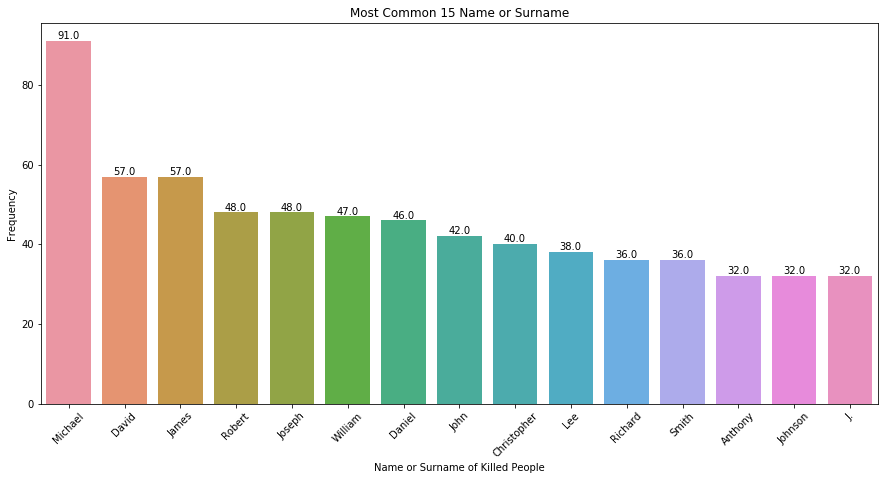

In [231]:
plt.figure(figsize=(15,7))          # alternative method like matplotlib
g=sns.barplot(x, y)
plt.xticks(rotation=45)
plt.xlabel('Name or Surname of Killed People')
plt.ylabel('Frequency')
plt.title('Most Common 15 Name or Surname')

for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+0.5));
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.04, p.get_height()+0.5))
    
    

## 3. Killed People According to Races (Pie Chart)

In [232]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [233]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [234]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [235]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [236]:
kill.dropna(inplace=True)

In [237]:
kill.shape

(2254, 14)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart**

In [238]:
kill.race.value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [239]:
labels=kill.race.value_counts().index

In [240]:
sizes=kill.race.value_counts().values

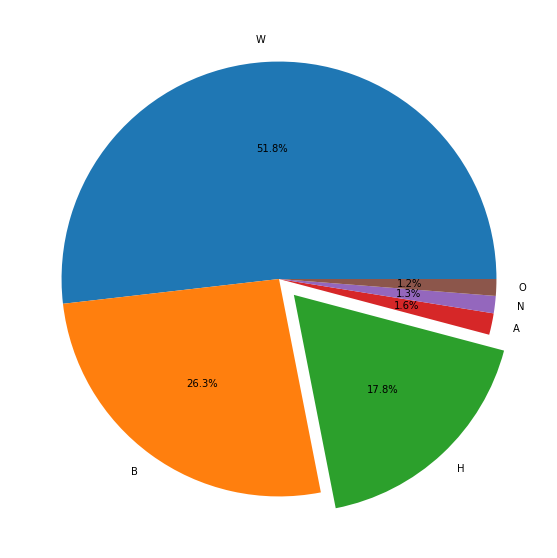

In [241]:
explode = (0, 0, 0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=0);

## 4a.Box plot of age in both genders separeted by manner of death.

In [242]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [243]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

In [244]:
kill.manner_of_death.describe()

count     2254
unique       2
top       shot
freq      2100
Name: manner_of_death, dtype: object

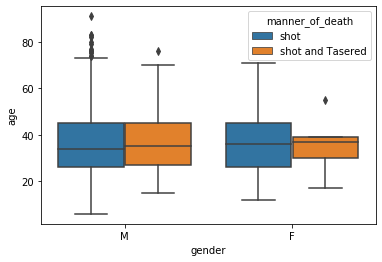

In [245]:
sns.boxplot( x ="gender", y = "age", hue="manner_of_death", data= kill)

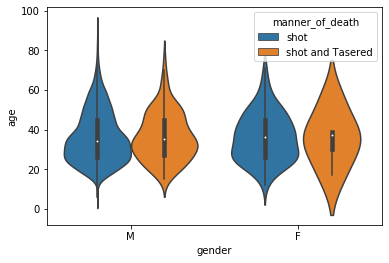

In [246]:
sns.violinplot( x ="gender", y = "age", hue="manner_of_death", data= kill)

plt.figure(figsize = (10, 7))
sns.swarmplot('gender', 'age', 'manner_of_death', kill, dodge = True)


## 4b. Swarm Plot (Do not use in large datasets. The memory will not be enogh!)

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

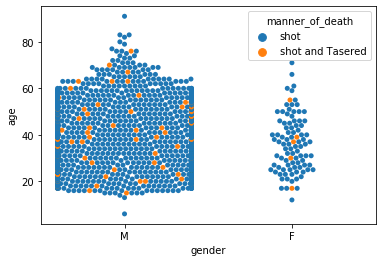

In [247]:
sns.swarmplot(x="gender", y="age",hue='manner_of_death',data=kill)

## 5. Kill properties (Count Plots)

**INSTRUCTION-1: Plot number of poeple by gender**

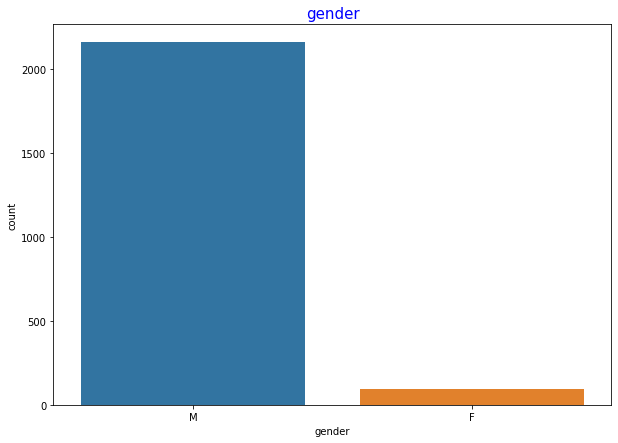

In [248]:
fig, ax = plt.subplots( figsize=(10, 7))
sns.countplot(x='gender',data=kill)
plt.title('gender',color = 'blue',fontsize=15);

**INSTRUCTION-2: Plot 7 most common kill weapons**

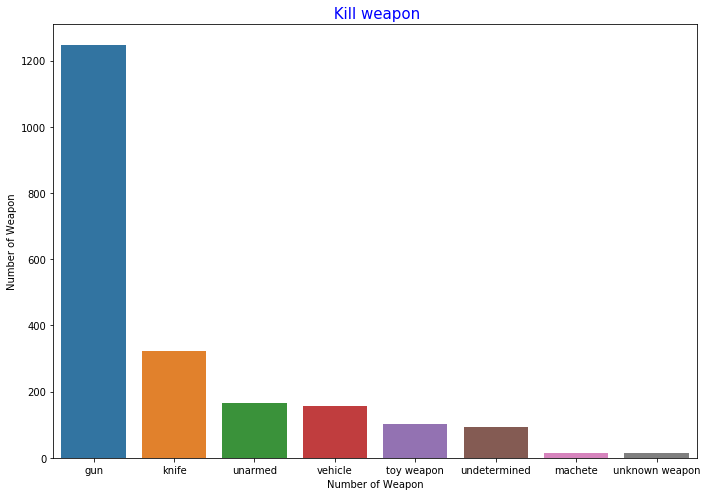

In [249]:
fig, ax = plt.subplots( figsize=(10, 7))
sns.countplot(x = 'armed',order=kill.armed.value_counts().iloc[:8].index, data = kill)

ax.set_ylabel('Number of Weapon')
ax.set_title(' Kill weapon', color = 'blue',fontsize=15)
ax.set_xlabel('Number of Weapon')
plt.tight_layout()


In [250]:
a = kill["armed"].values
common = Counter(a).most_common(7)
common

[('gun', 1247),
 ('knife', 324),
 ('unarmed', 165),
 ('vehicle', 158),
 ('toy weapon', 102),
 ('undetermined', 92),
 ('machete', 16)]

In [251]:
x=pd.DataFrame(common)
x

,0,1
0,gun,1247
1,knife,324
2,unarmed,165
3,vehicle,158
4,toy weapon,102
5,undetermined,92
6,machete,16


In [252]:
#sns.countplot(x='age',data=tips,estimator=np.std)

In [260]:
cc= kill["armed"].value_counts()[:7].index

In [261]:
dd= kill["armed"].value_counts[:7].values

TypeError: 'method' object is not subscriptable

In [151]:
sns.barplot(cc,dd)
plt.xticks(rotation=45)

NameError: name 'dd' is not defined

**INSTRUCTION-3: Plot number of age of killed people under two groups : Under 25 and Above 25**

Text(0.5, 1.0, 'Age of killed people')

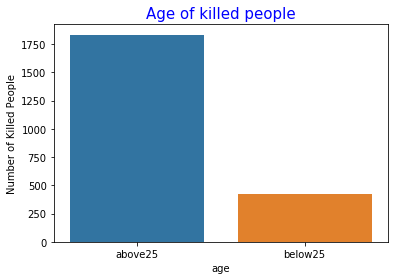

In [255]:
age_25 =['above25' if i >= 25 else 'below25' for i in kill.age]
df = pd.DataFrame({'age':age_25})
sns.countplot(x=df.age)
plt.ylabel('Number of Killed People')
plt.title('Age of killed people',color = 'blue',fontsize=15)

In [ ]:
# 2.Method
#above25 = kill[kill['age']>25]["age"].counts()
#under25 = kill[kill['age']>25]["age"].counts()
#df = pd.Series([above25,under25], index=['above25','under25'])
#df.plot.bar()

iki degeri olan kategorik degiskenler icin countplot cok pratik denebilir. ilave count islemi yapmadan direkt plot yapilabiliyor

In [ ]:
#age1 = pd.cut(kill["age"], [0, 25, 90])
#df_age = pd.DataFrame(age1)
#df_age.head()

In [262]:
kill["age_cat"] = kill.age.apply(lambda x: 'above25' if x >= 25 else 'below25')


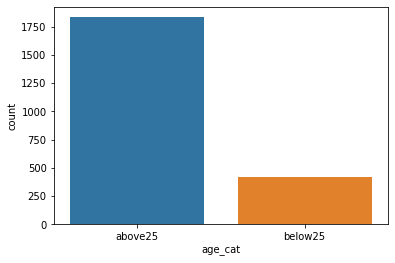

In [263]:
sns.countplot(x= "age_cat", data = kill)

**INSTRUCTION-4: Plot number of killed poeple by race**

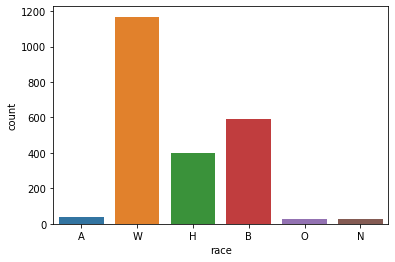

In [264]:
sns.countplot(x='race',data=kill)

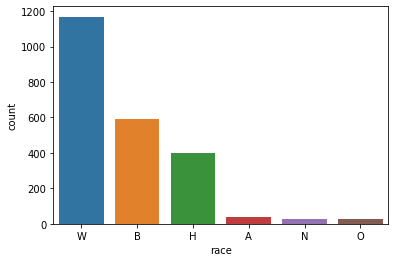

In [265]:
sns.countplot(x = 'race', order=kill.race.value_counts().iloc[:8].index, data = kill)


In [266]:
kill.race.value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

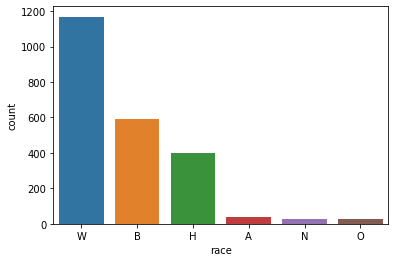

In [269]:
sns.countplot(kill.race, order=kill.groupby("race").race.count().sort_values(ascending=False).index)

**INSTRUCTION-5: Plot 12 most dangerous cities**

In [267]:
dang_city = kill.city.value_counts()
dang_city

Los Angeles     35
Phoenix         28
Houston         24
Chicago         22
Austin          18
                ..
West Linn        1
Claremont        1
Merced           1
Largo            1
Water Valley     1
Name: city, Length: 1282, dtype: int64

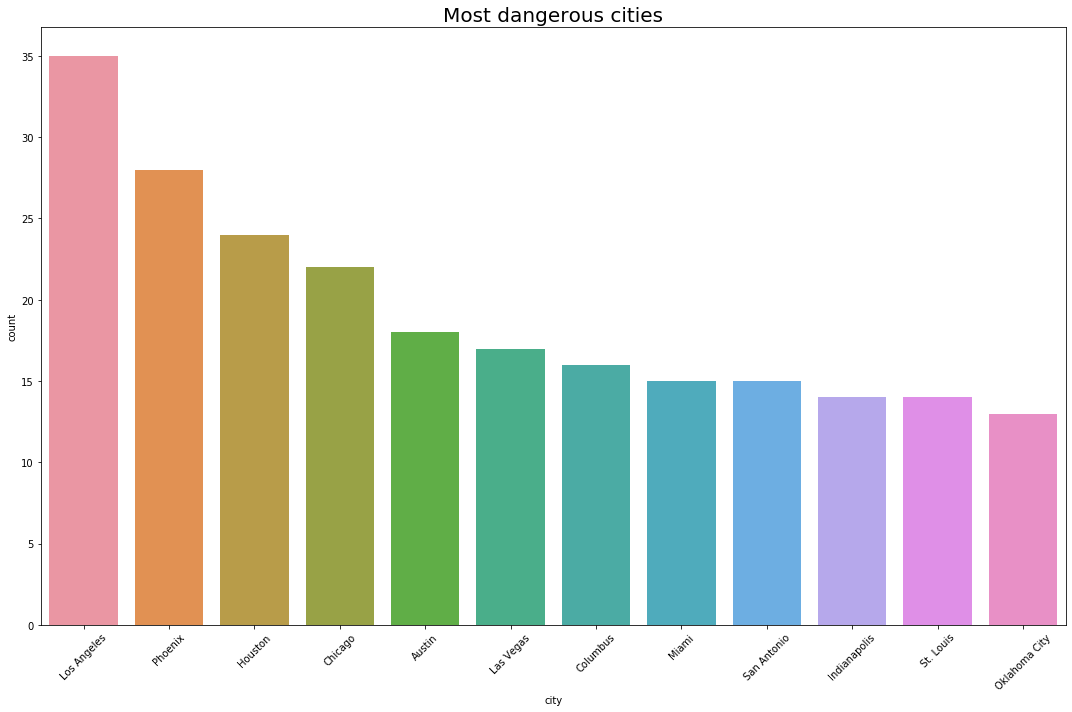

In [268]:
fig, ax = plt.subplots( figsize=(15, 10))
sns.countplot(x='city', data=kill, order=kill.city.value_counts().iloc[:12].index)

ax.set_xticklabels(dang_city.index, rotation=45); 
plt.title('Most dangerous cities', size= 20)
plt.tight_layout()


In [ ]:
aa = kill.
bb = 

**INSTRUCTION-6: Plot 20 most dangerous states**

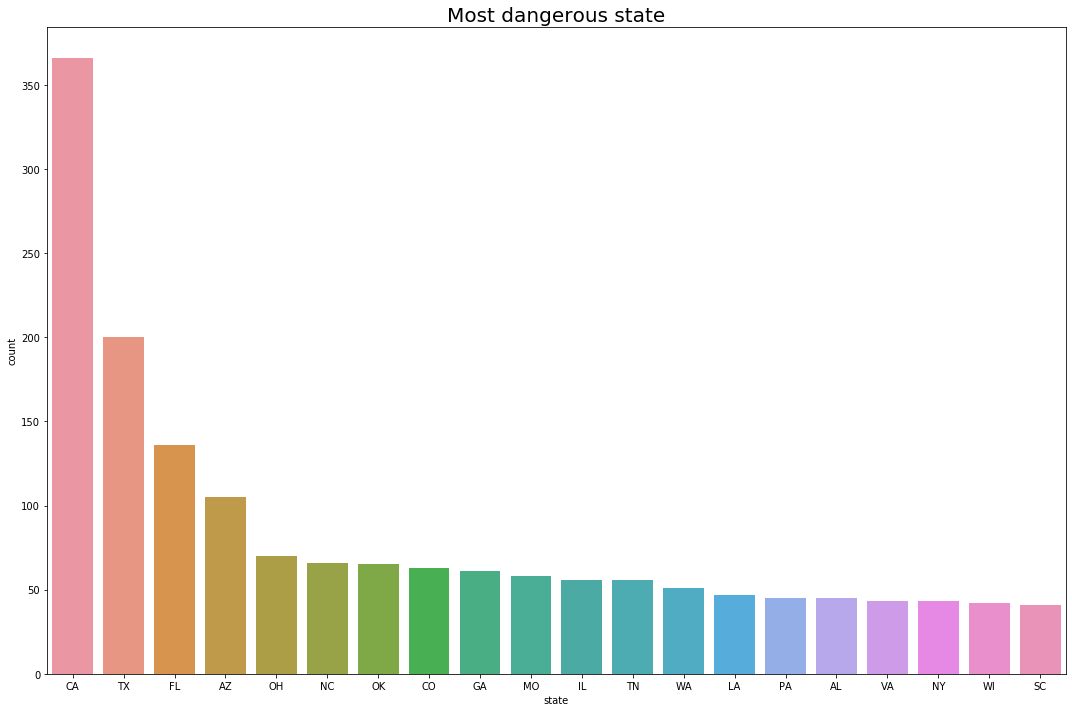

In [270]:
fig, ax = plt.subplots( figsize=(15, 10))
sns.countplot(x='state', data=kill, order=kill.state.value_counts().iloc[:20].index)
plt.title('Most dangerous state', size= 20)

plt.tight_layout()


In [271]:
kill.signs_of_mental_illness.dtypes

dtype('bool')

In [273]:
gg = kill.state.value_counts()[:20].index
hh = kill.state.value_counts()[:20].values

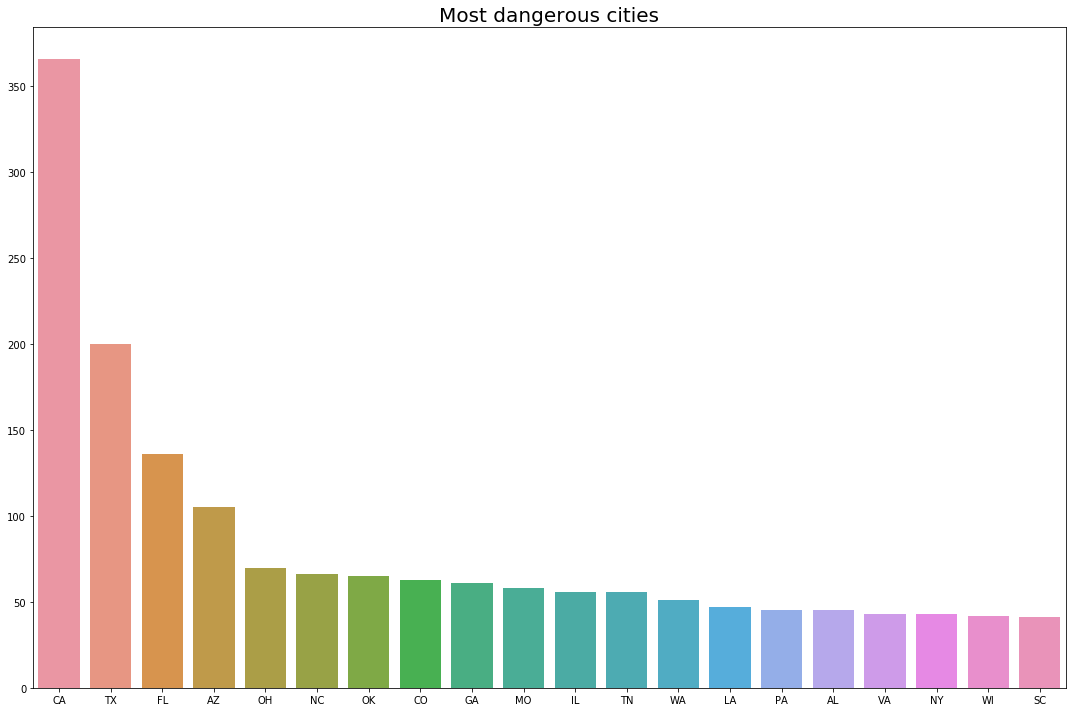

In [274]:
plt.figure( figsize=(15, 10))
sns.barplot(gg,hh)

ax.set_xticklabels(dang_city.index, rotation=45); 
plt.title('Most dangerous cities', size= 20)
plt.tight_layout()


**INSTRUCTION-7: Plot Having mental ilness or not for killed people**

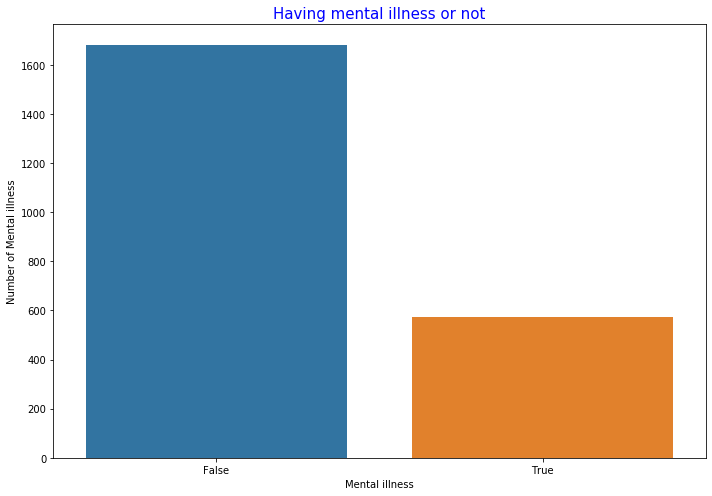

In [275]:
fig, ax = plt.subplots( figsize=(10, 7))
sns.countplot(x='signs_of_mental_illness',data=kill)
plt.title('Having mental illness or not', color = 'blue',fontsize=15)
ax.set_ylabel('Number of Mental illness')
ax.set_xlabel('Mental illness')
plt.tight_layout()


**INSTRUCTION-8: Plot number of Threat Types**

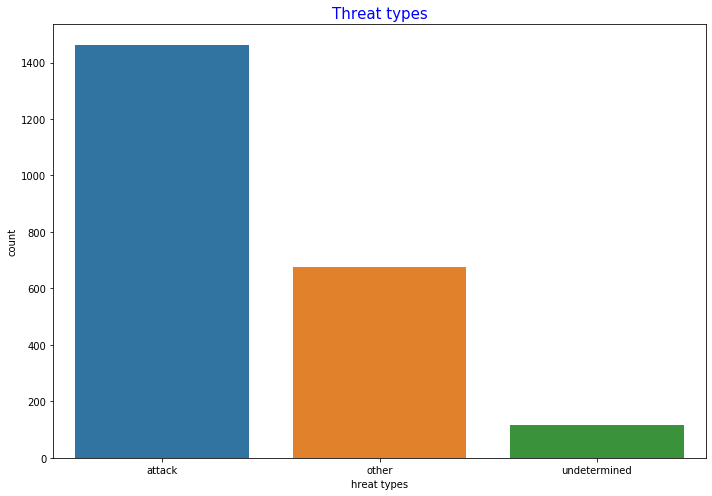

In [276]:
fig, ax = plt.subplots( figsize=(10, 7))
sns.countplot(x='threat_level',data=kill)
plt.title('Threat types', color = 'blue',fontsize=15)
ax.set_xlabel('hreat types')
plt.tight_layout()


**INSTRUCTION-9: Plot number of Flee Types**

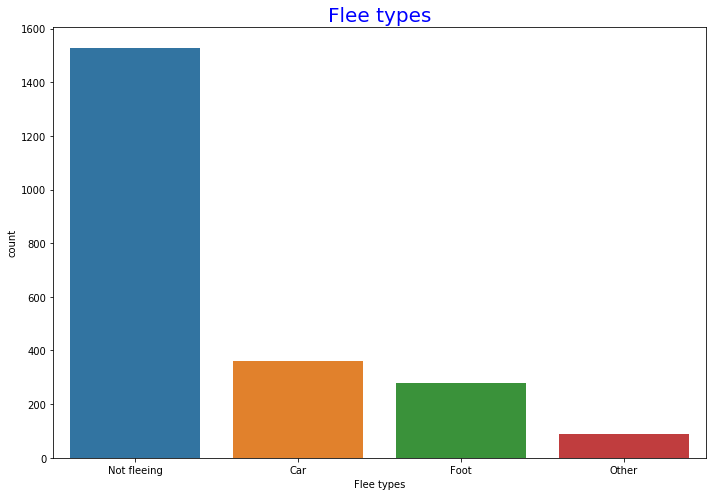

In [277]:
fig, ax = plt.subplots( figsize=(10, 7))
sns.countplot(x='flee',data=kill)
plt.title('Flee types', color = 'blue',fontsize=20)
ax.set_xlabel('Flee types')
plt.tight_layout()
